<a href="https://colab.research.google.com/github/giankev/wikidata_cultural_classifier/blob/main/notebooks/dataset_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = '/content/train.csv'
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Errore durante il caricamento: {e}")

print("Informazioni sul Dataset")
df.info()

print("Prime 5 righe")
print(df.head())

print("Dimensioni del Dataset (righe, colonne)")
print(df.shape)

print("Statistiche Descrittive (per colonne numeriche, se presenti)")
print(df.describe(include='all'))

Informazioni sul Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item         6251 non-null   object
 1   name         6251 non-null   object
 2   description  6251 non-null   object
 3   type         6251 non-null   object
 4   category     6251 non-null   object
 5   subcategory  6251 non-null   object
 6   label        6251 non-null   object
dtypes: object(7)
memory usage: 342.0+ KB
Prime 5 righe
                                      item           name  \
0    http://www.wikidata.org/entity/Q32786            916   
1      http://www.wikidata.org/entity/Q371            !!!   
2  http://www.wikidata.org/entity/Q3729947      ¡Soborno!   
3   http://www.wikidata.org/entity/Q158611            +44   
4   http://www.wikidata.org/entity/Q280375  1 Monk Street   

                                description    type          category  \
0   

Distribuzione della Variabile Target ('label')
label
cultural exclusive         2691
cultural agnostic          1872
cultural representative    1688
Name: count, dtype: int64
Percentuale della Variabile Target ('label')
label
cultural exclusive         43.049112
cultural agnostic          29.947208
cultural representative    27.003679
Name: proportion, dtype: float64


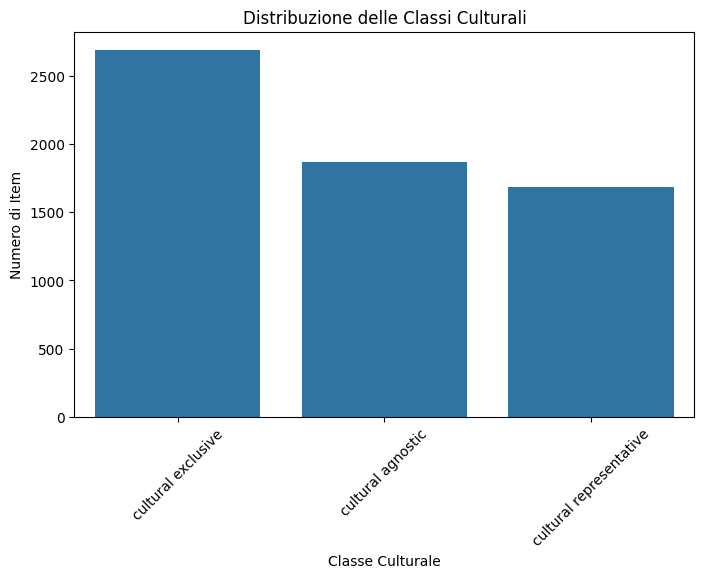

In [17]:
print("Distribuzione della Variabile Target ('label')")
label_counts = df['label'].value_counts()
print(label_counts)

print("Percentuale della Variabile Target ('label')")
print(df['label'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', order=label_counts.index)
plt.title('Distribuzione delle Classi Culturali')
plt.xlabel('Classe Culturale')
plt.ylabel('Numero di Item')
plt.xticks(rotation=45)
plt.show()

 Analisi Feature: type
Numero valori unici: 2
Valori più frequenti:
type
entity     3924
concept    2327
Name: count, dtype: int64


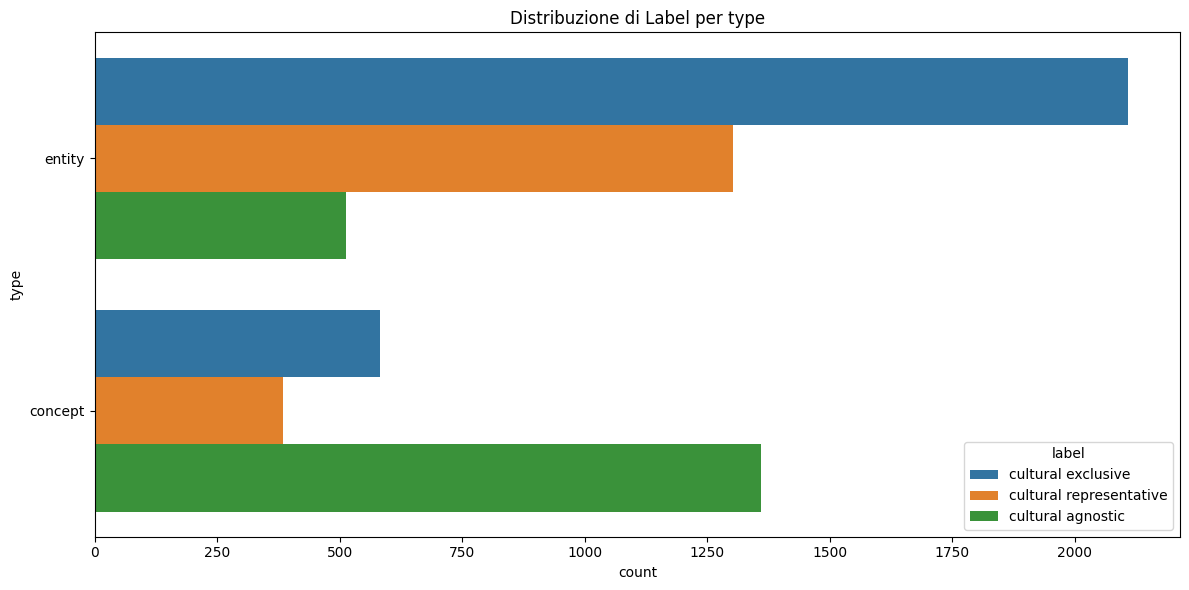


Tabella di Contingenza: type vs label
label    cultural agnostic  cultural exclusive  cultural representative
type                                                                   
concept               1360                 582                      385
entity                 512                2109                     1303
 Analisi Feature: category
Numero valori unici: 19
Valori più frequenti:
category
politics                   532
sports                     429
geography                  411
architecture               396
philosophy and religion    395
literature                 363
music                      348
food                       346
fashion                    319
visual arts                313
Name: count, dtype: int64


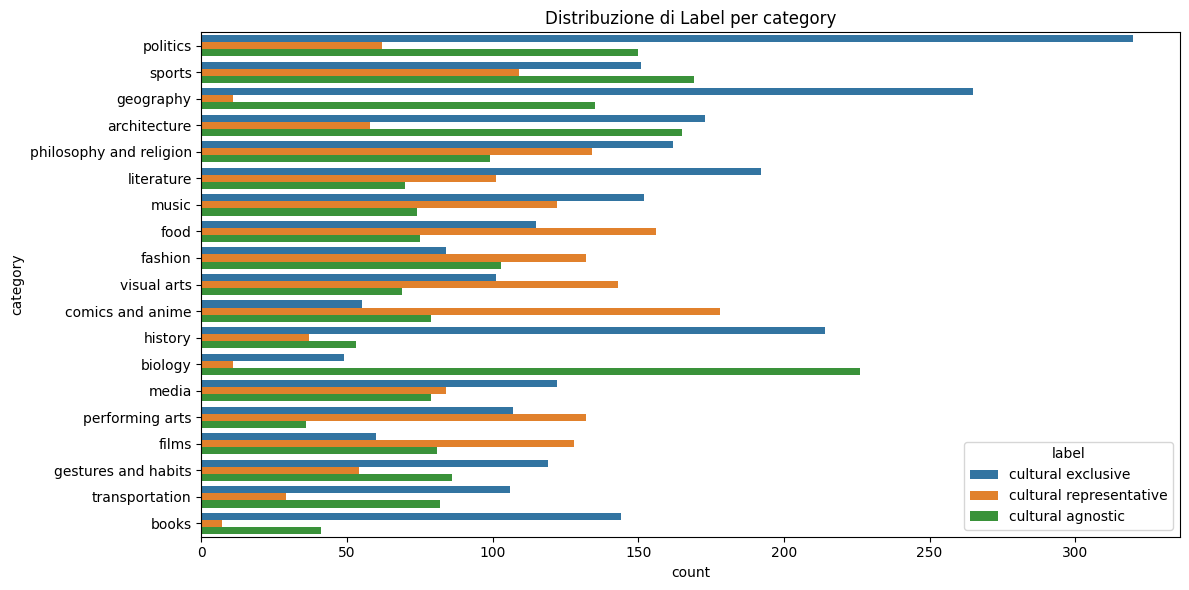


Tabella di Contingenza: category vs label
label                    cultural agnostic  cultural exclusive  \
category                                                         
architecture                           165                 173   
biology                                226                  49   
books                                   41                 144   
comics and anime                        79                  55   
fashion                                103                  84   
films                                   81                  60   
food                                    75                 115   
geography                              135                 265   
gestures and habits                     86                 119   
history                                 53                 214   
literature                              70                 192   
media                                   79                 122   
music                            

In [19]:
categorical_features = ["type", "category", "subcategory"]

for col in categorical_features:
    print(f" Analisi Feature: {col}")
    print(f"Numero valori unici: {df[col].nunique()}")
    print(f"Valori più frequenti:\n{df[col].value_counts().head(10)}")

    if df[col].nunique() < 50: # Visualizza solo se non ci sono troppe categorie
         plt.figure(figsize=(12, 6))
         # Mostra come si distribuisce 'label' per ogni categoria di 'col'
         sns.countplot(data=df, y=col, hue='label', order=df[col].value_counts().iloc[:20].index)
         plt.title(f'Distribuzione di Label per {col}')
         plt.tight_layout()
         plt.show()

    print(f"\nTabella di Contingenza: {col} vs label")
    print(pd.crosstab(df[col], df['label']))

Analisi Feature Testuali


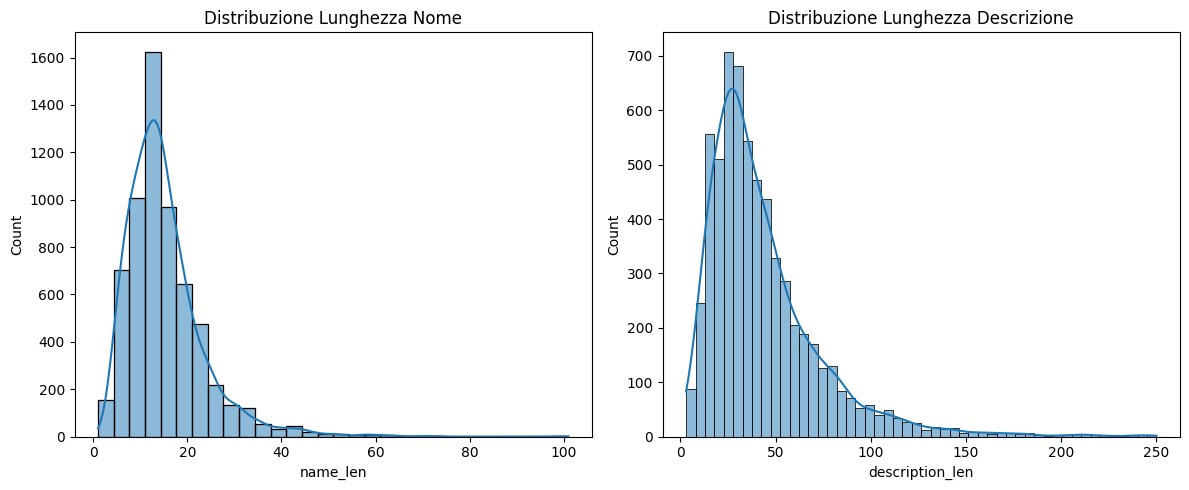

In [20]:
print("Analisi Feature Testuali")
df['name_len'] = df['name'].str.len()
df['description_len'] = df['description'].str.len()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['name_len'], bins=30, kde=True)
plt.title('Distribuzione Lunghezza Nome')
plt.subplot(1, 2, 2)
sns.histplot(df['description_len'], bins=50, kde=True)
plt.title('Distribuzione Lunghezza Descrizione')
plt.tight_layout()
plt.show()


In [24]:
import nltk
import re
from nltk.corpus import stopwords

try:
    nltk.download('stopwords', quiet=True)
except Exception as e:
    print(f"Errore durante il download di NLTK stopwords: {e}")

stop_words = set(stopwords.words('english'))
# funzione di preprocessing delle descrizioni
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) # Rimuovi punteggiatura
    text = re.sub(r'\d+', '', text) # Rimuovi numeri
    # Rimuovi stopwords (usa la variabile stop_words definita sopra)
    if 'stop_words' in globals() and stop_words:
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        print("Attenzione: variabile stop_words non definita correttamente.")
    return text

# Applicazione della funzione definita sopra al DataFrame
if isinstance(df, pd.DataFrame) and 'description' in df.columns:

    df['description'] = df['description'].fillna('')

    # Applica la funzione di preprocessing
    print("Applicando il preprocessing del testo alla colonna 'description'")
    df['desc_cleaned'] = df['description'].apply(preprocess_text)
    print(df[['description', 'desc_cleaned']].head())
else:
    print("Impossibile applicare il preprocessing del testo.")

Applicando il preprocessing del testo alla colonna 'description'
                                description  \
0                   2012 film by M. Mohanan   
1  American dance-punk band from California   
2                         Mort & Phil comic   
3                             American band   
4               building in Monmouth, Wales   

                         desc_cleaned  
0                        film mohanan  
1  american dancepunk band california  
2                     mort phil comic  
3                       american band  
4             building monmouth wales  


In [29]:
from collections import Counter

if 'desc_cleaned' not in df.columns:
    print("Errore!")
else:
    print(" Analisi di Frequenza delle Parole per Classe")
    word_counters = {}

    for cultural_label in df['label'].unique():

        print(f" Analizzando Classe: {cultural_label} ")
        label_df = df[df['label'] == cultural_label]['desc_cleaned']

        # Concatenazioni di tutte le descrizioni per una determinata classe 'label'
        all_text_for_label = ' '.join(label_df.astype(str))

        # Se non c'è testo per questa etichetta, salta
        if not all_text_for_label.strip():
            print("Nessun testo trovato per questa classe dopo la pulizia.")
            continue

        # Dividi la lunga stringa in singole parole (tokenizzazione semplice)
        words = all_text_for_label.split()
        word_counts = Counter(words)

        # Mostra le N parole più comuni (es. top 20)
        print(f"Top 20 parole più comuni:")
        for word, count in word_counts.most_common(20):
             print(f"  '{word}': {count}")

 Analisi di Frequenza delle Parole per Classe
 Analizzando Classe: cultural exclusive 
Top 20 parole più comuni:
  'german': 239
  'film': 88
  'government': 86
  'company': 82
  'music': 73
  'festival': 71
  'city': 71
  'political': 68
  'american': 66
  'literary': 65
  'united': 62
  'traditional': 61
  'party': 53
  'states': 53
  'type': 52
  'germany': 51
  'art': 51
  'former': 50
  'book': 50
  'club': 49
 Analizzando Classe: cultural representative 
Top 20 parole più comuni:
  'american': 206
  'film': 153
  'japanese': 73
  'german': 70
  'director': 64
  'french': 55
  'manga': 53
  'actor': 52
  'series': 51
  'painting': 47
  'british': 45
  'studio': 44
  'company': 44
  'music': 44
  'artist': 44
  'movement': 44
  'dance': 43
  'writer': 41
  'animation': 40
  'genre': 40
 Analizzando Classe: cultural agnostic 
Top 20 parole più comuni:
  'film': 92
  'used': 92
  'type': 92
  'person': 69
  'genre': 59
  'building': 52
  'plant': 48
  'art': 47
  'political': 46
  'f

 Visualizzazione con Word Clouds
Generando Word Cloud per: cultural exclusive
Generando Word Cloud per: cultural representative
Generando Word Cloud per: cultural agnostic


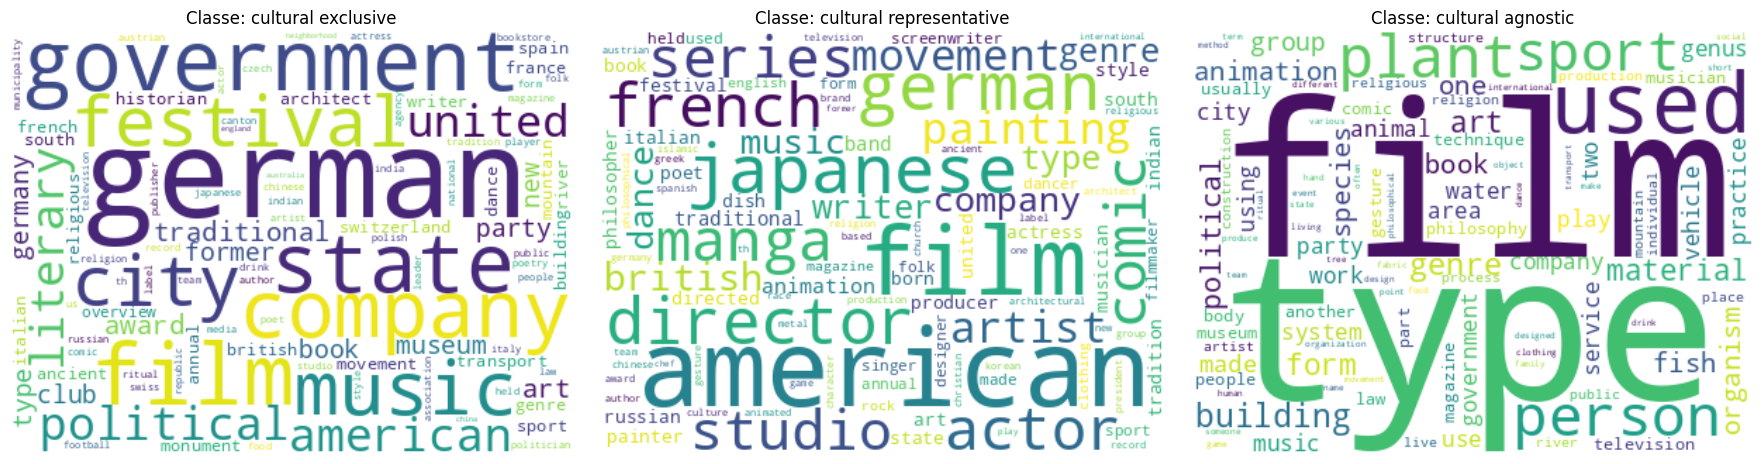

In [32]:
try:
    from wordcloud import WordCloud
except ImportError:
    print("Libreria 'wordcloud' non trovata. Installala con: !pip install wordcloud")

if 'df' in locals() and 'desc_cleaned' in df.columns:
    print(" Visualizzazione con Word Clouds")

    unique_labels = df['label'].unique()
    num_labels = len(unique_labels)

    plt.figure(figsize=(6 * num_labels, 5)) # Larghezza proporzionale al numero di classi

    # Itera sulle classi e crea una word cloud per ciascuna
    for i, cultural_label in enumerate(unique_labels):
        print(f"Generando Word Cloud per: {cultural_label}")
        plt.subplot(1, num_labels, i + 1)
        all_text_for_label = ' '.join(df[df['label'] == cultural_label]['desc_cleaned'].astype(str))

        if all_text_for_label.strip():
            try:
                wordcloud = WordCloud(width=400, height=300,
                                      background_color='white',
                                      max_words=100, # Limita il numero di parole mostrate
                                      contour_width=1,
                                      contour_color='steelblue',
                                      collocations=False # Evita di cercare coppie di parole comuni
                                     ).generate(all_text_for_label)

                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
            except ValueError as ve:
                 print(f"  > Errore durante la generazione della word cloud: {ve}")
                 plt.text(0.5, 0.5, 'Errore Generazione', horizontalalignment='center', verticalalignment='center')
                 plt.axis('off')
        else:
            print(f"  > Nessun testo disponibile per la word cloud.")
            plt.text(0.5, 0.5, 'Nessun Testo', horizontalalignment='center', verticalalignment='center')
            plt.axis('off')

        plt.title(f'Classe: {cultural_label}')

    plt.tight_layout(pad=2.0)
    plt.show()

else:
     print("Impossibile generare Word Clouds: DataFrame 'df' o colonna 'desc_cleaned' non trovati.")